<a href="https://colab.research.google.com/github/Daimond92/python_data_science/blob/develop/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 1**

## Importaciones

In [60]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [4]:
print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


## Cargar datos

In [1]:
archivo = 'https://raw.githubusercontent.com/Daimond92/python_data_science/refs/heads/develop/Data/flights.csv'

In [61]:
datos = pd.read_csv(archivo)

## Analisis exploratorio

In [6]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [7]:
datos.shape

(71175, 11)

In [8]:
round(.88*60)

53

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [10]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [11]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


### Analisis gráfico

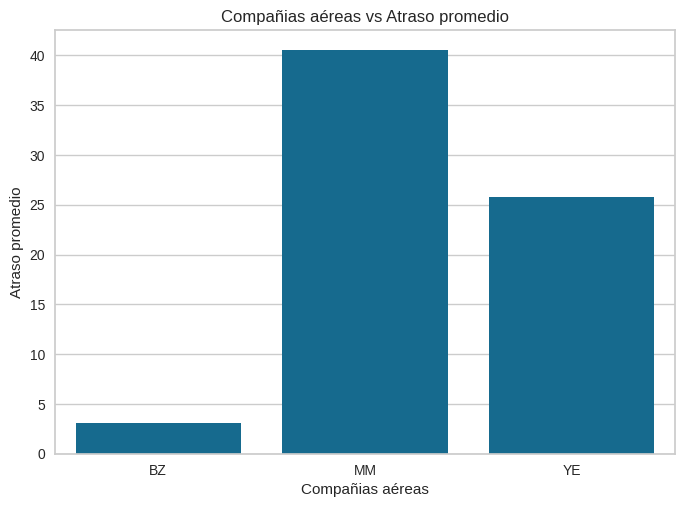

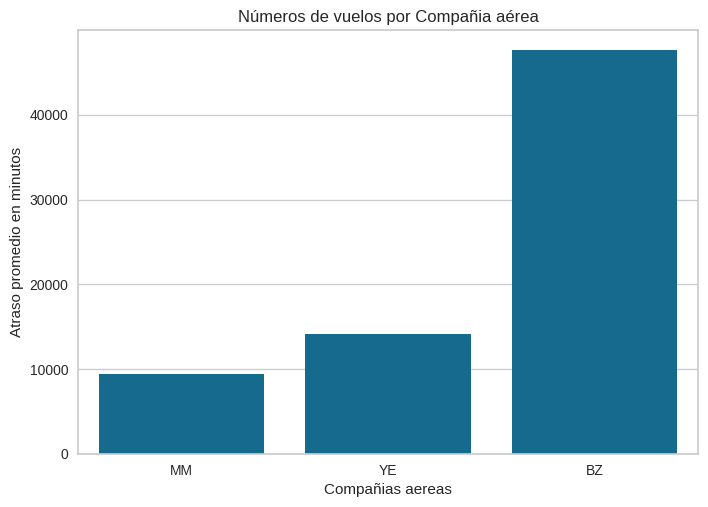

In [13]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aéreas vs Atraso promedio')
plt.xlabel('Compañias aéreas')
plt.ylabel('Atraso promedio')
plt.show()

sns.countplot(x='airline', data=datos)
plt.title('Números de vuelos por Compañia aérea')
plt.xlabel('Compañias aereas')
plt.ylabel('Atraso promedio en minutos')
plt.show()

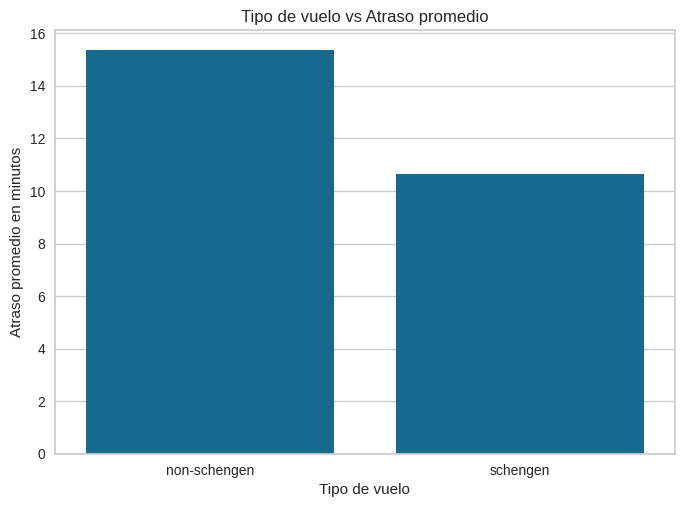

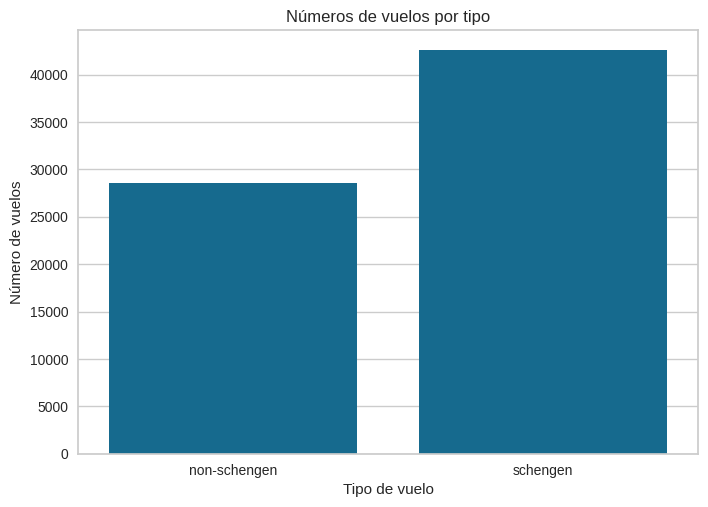

In [14]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(x='schengen', data=datos)
plt.title('Números de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

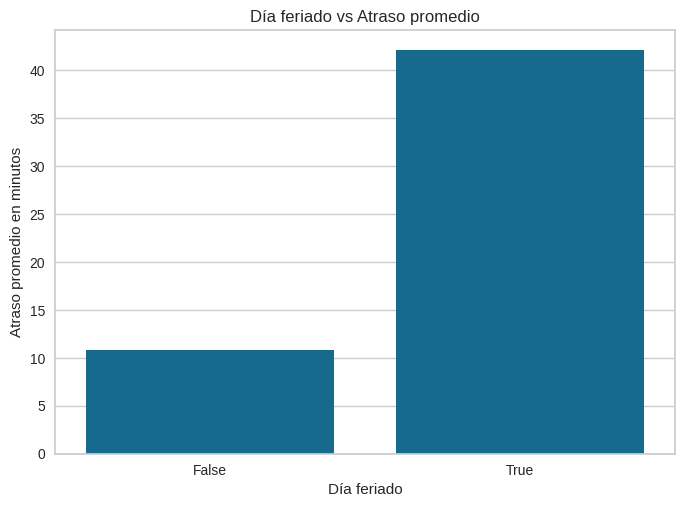

In [15]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Día feriado vs Atraso promedio')
plt.xlabel('Día feriado')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [16]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [17]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


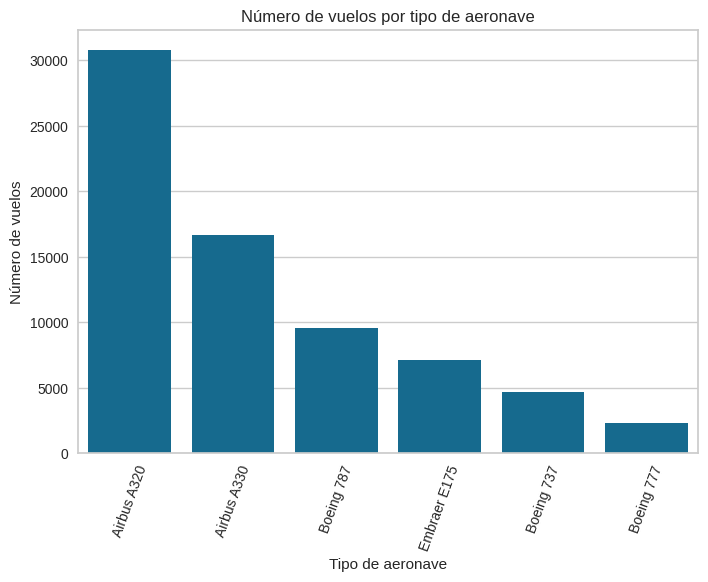

In [19]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

### Distribución de datos

<Axes: xlabel='arrival_time', ylabel='Count'>

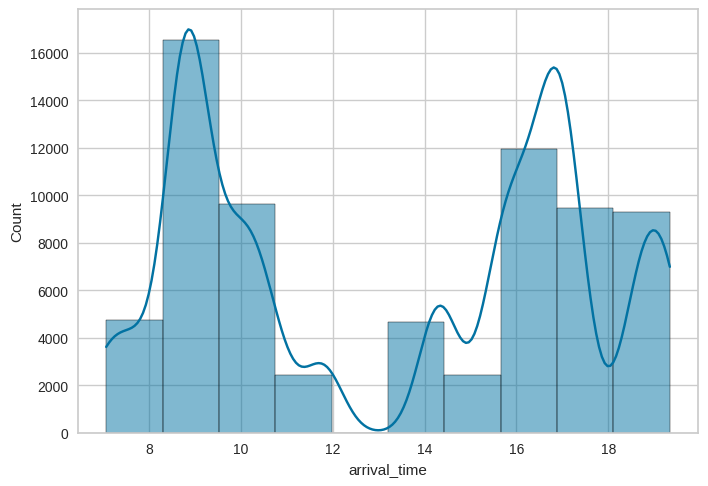

In [23]:
sns.histplot(data=datos, x='arrival_time', kde=True, bins=10)

In [21]:
def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

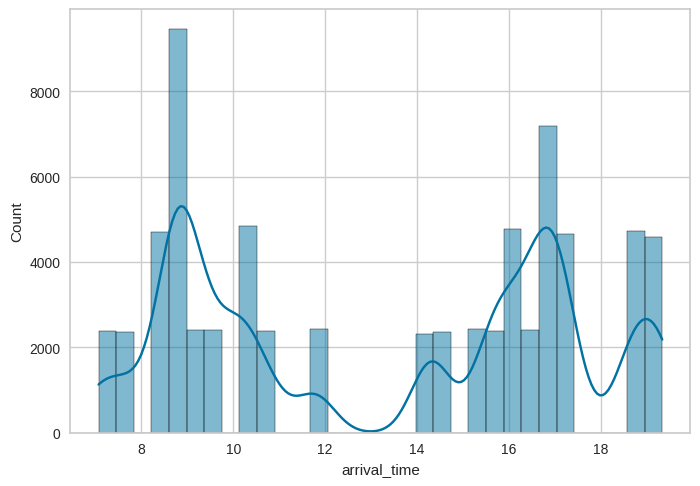

In [22]:
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

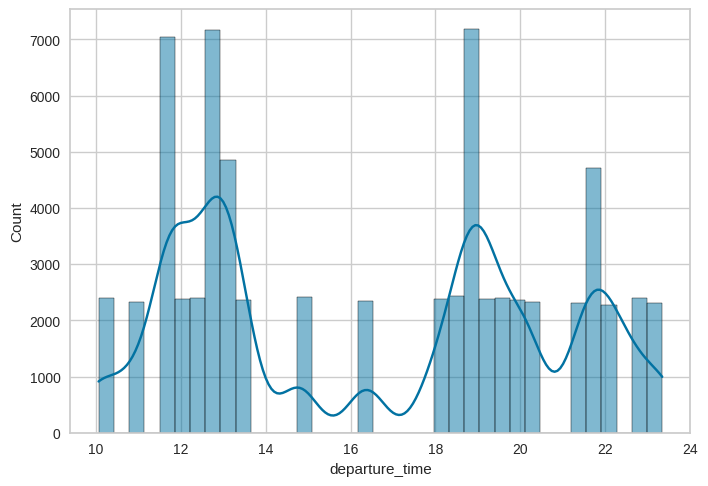

In [24]:
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)

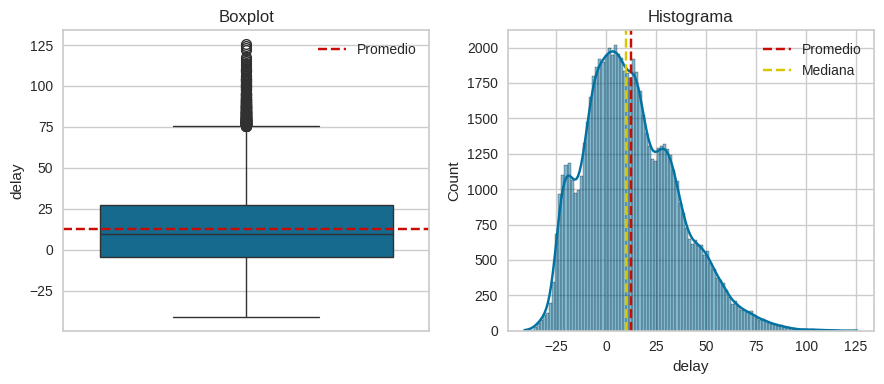

In [28]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', kde=True, binwidth=binwidth, ax=ax[1])
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#**CLASE 2**

## Creando columnas

In [30]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [62]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [63]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5, 6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
16578,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,10,2013,False,-19.085740,2013-01-11,False,Friday
55991,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,82,2020,False,-13.503698,2020-03-23,False,Monday
23295,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,93,2014,False,23.382113,2014-04-04,False,Friday
41200,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,191,2017,True,41.848819,2017-07-11,False,Tuesday
52092,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,187,2019,False,34.037861,2019-07-07,True,Sunday


## Feature encoding

In [53]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [64]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
44657,26,MM,Airbus A320,0,TCY,8.885071,10.885071,57,2018,0,30.163233,2018-02-27,0,Tuesday
14431,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,232,2012,0,-14.861377,2012-08-20,0,Monday
54317,30,BZ,Embraer E175,1,PUA,8.923441,12.923441,336,2019,0,8.894844,2019-12-03,0,Tuesday
70495,30,BZ,Embraer E175,1,PUA,8.923441,12.923441,319,2022,0,-14.821291,2022-11-16,0,Wednesday
7037,17,BZ,Airbus A330,0,CNU,16.718722,21.718722,104,2011,0,8.069505,2011-04-15,0,Friday


### Códificación por get_dummies

In [55]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
52452,23,1,18.801235,21.801235,211,2019,0,-1.401332,2019-07-31,0,...,1,0,0,0,0,0,0,0,0,1
23774,21,1,7.065594,10.065594,124,2014,0,4.699372,2014-05-05,0,...,0,0,0,0,1,0,0,0,0,0
25567,14,1,7.708301,11.708301,244,2014,0,2.275333,2014-09-02,0,...,0,0,1,0,0,0,0,0,1,0
1619,26,0,8.885071,10.885071,107,2010,0,32.840237,2010-04-18,1,...,1,0,0,0,0,0,1,0,0,0
7863,4,1,11.781391,14.781391,159,2011,0,-20.905928,2011-06-09,0,...,1,0,0,0,0,0,0,1,0,0


### Codificación por OneHotEncoder

In [66]:
categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos_codificados_2 = one_hot_enc.fit_transform(datos)
df2 = pd.DataFrame(datos_codificados_2, columns=one_hot_enc.get_feature_names_out())
df2.sample(5)

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
63511,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22,0,8.794147,11.794147,219,2021,0,2.057072,2021-08-08,1
27687,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,1,15.729617,18.729617,20,2015,0,13.787543,2015-01-21,0
28440,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9,0,10.733469,12.733469,71,2015,0,-17.760088,2015-03-13,0
25349,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22,0,8.794147,11.794147,229,2014,0,15.209422,2014-08-18,0
53950,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19,1,16.24522,19.24522,311,2019,0,30.93242,2019-11-08,0


## Limpiando datos

In [57]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [58]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [59]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time','year', 'day', 'date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
58503,1,14.258911,1,34.341285,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
39022,0,8.939996,0,24.082086,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
39224,1,16.909690,0,15.411810,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
59608,0,19.341235,0,4.229146,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
67878,1,8.564949,0,14.503692,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3889,0,10.733469,0,-5.263761,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
40070,0,10.177197,0,-2.307563,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9360,0,10.172731,0,9.031793,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
21831,0,15.967963,0,-11.821072,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26975,0,8.885071,0,27.598180,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0


#**CLASE 3**

https://scikit-learn.org/stable/

#**CLASE 4**